## k-NN Regressor

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Custom k-NN Regressor

In [2]:
def my_knn_regressor(X_train, y_train, X_test, k):
    """
    Perform k-Nearest Neighbors (kNN) regression.

    Parameters:
        X_train (ndarray): 1D array of training input features.
        y_train (ndarray): 1D array of training output values.
        X_test (ndarray): 1D array of test input features.
        k (int): Number of nearest neighbors to consider.

    Returns:
        ndarray: Predicted output values for the test inputs.
    """
    predictions = []

    for x_test_point in X_test:
        # Calculate absolute distances between the test point and all training points
        distances = np.abs(X_train - x_test_point)

        # Get the indices of the k nearest neighbors (smallest distances)
        nearest_neighbor_indices = np.argsort(distances)[:k]

        # Get the corresponding output values of the nearest neighbors
        nearest_outputs = y_train[nearest_neighbor_indices]

        # Compute the average of the nearest outputs
        prediction = np.mean(nearest_outputs)

        # Store the prediction
        predictions.append(prediction)

    return np.array(predictions)

### Generating Synthetic Data

In [3]:
np.random.seed(0)

num_samples = 50
X_train = np.sort(5 * np.random.rand(num_samples))
noise = 0.1 * np.random.randn(num_samples)
y_train = np.sin(X_train) + noise
X_test = np.linspace(0, 5, 100)

### Making Predictions

In [8]:
k = 2 
y_pred = my_knn_regressor(X_train , y_train , X_test , k)

### Plotting

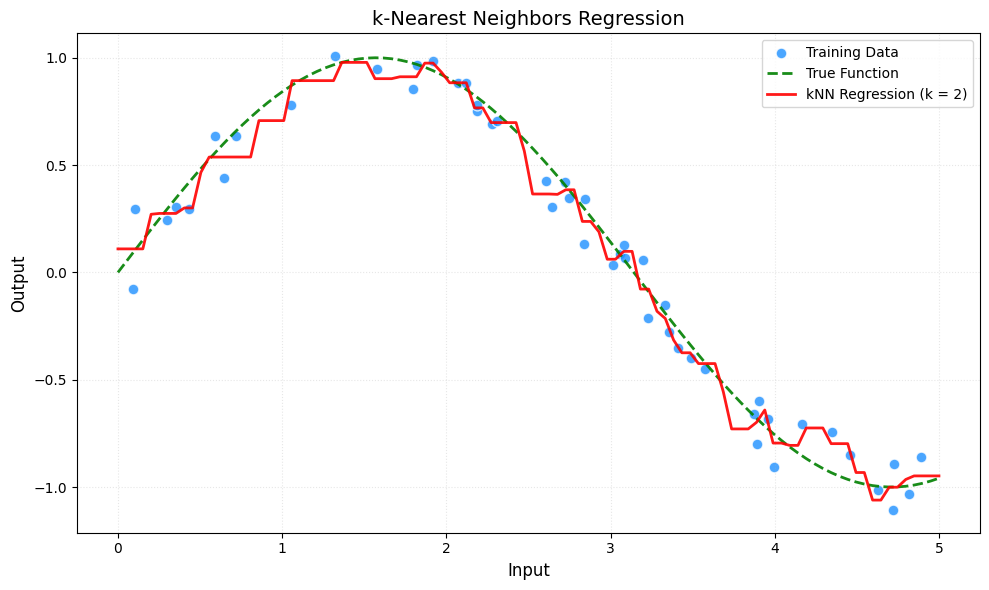

In [20]:
plt.figure(figsize = (10 , 6))
plt.scatter(X_train , y_train , color = 'dodgerblue' , edgecolor = 'white' , s = 60 , label = 'Training Data' , alpha = 0.8)
plt.plot(X_test , np.sin(X_test) , color = 'green' , linestyle = '--' , linewidth = 2 , label = 'True Function' , alpha = 0.9)
plt.plot(X_test , y_pred , color = 'red' , linewidth = 2 , label = f'kNN Regression (k = {k})' , alpha = 0.9)
plt.xlabel('Input' , fontsize = 12)
plt.ylabel('Output' , fontsize = 12)
plt.title('k-Nearest Neighbors Regression' , fontsize = 14)
plt.legend(fontsize = 10 , frameon = True)
plt.grid(True , linestyle = ':', alpha = 0.3)
plt.tight_layout()
plt.show()